## Project Title:            Algerian Forest Temperature Prediction Project
### Technology:              Machine Learning Technology
### Domain:                  Agriculture
### Project Difficulty Level: Intermediate

> Problem Statement:

The Goal is to predict the temperature of the forest. This is basically a Regression problem where the forest has recorded from June 2012 to September 2012. Our goal will be to create a Linear Regression Model, train it on the data with the optimal parameters using a grid search, and then evaluate the model's capabilities on a test set.

> Dataset to downloaded from the below link:

https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#






> In this Notebook:

- Modelling on Selected and transformed features
- Hyperparameter Tuning
- Using Grid Search and Cross Validation techniques to build optimozed model
- To Apply Grid Search we need to understand the hyperparameters for each regression algorithm we applied Above.


In [405]:
# Importing Libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None) # to disply all columns

In [406]:
#ls

# Selected Features oNly

In [407]:
dataset = pd.read_csv("prepared_tranformed_new_data_train.csv",usecols = ['day',	'month',	'RH',	'Region'	,'Classes_notfire',	'FFMCiqrO_Boxcox'	,'DMCiqrO_Boxcox','Temperature'])
# Finding the shape of dataset
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in the dataset\n")
dataset.head()

There are 162 rows and 8 columns in the dataset



,day,month,Temperature,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox
0,11,7,33,76,0.0,1,2.246811e+07,2.753811
1,14,6,30,78,0.0,1,5.950505e+06,1.860759
2,4,6,25,89,0.0,1,2.849455e+06,0.271226
3,16,6,29,87,1.0,1,2.849455e+06,1.728677
4,25,6,31,64,0.0,0,2.969391e+07,3.774977


In [408]:
# Finding the information about the dataset:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              162 non-null    int64  
 1   month            162 non-null    int64  
 2   Temperature      162 non-null    int64  
 3   RH               162 non-null    int64  
 4   Region           162 non-null    float64
 5   Classes_notfire  162 non-null    int64  
 6   FFMCiqrO_Boxcox  162 non-null    float64
 7   DMCiqrO_Boxcox   162 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 10.2 KB


In [409]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
day,162.0,1.629630e+01,8.934467e+00,1.000000e+00,9.000000e+00,1.700000e+01,2.400000e+01,3.100000e+01
month,162.0,7.450617e+00,1.098008e+00,6.000000e+00,6.250000e+00,7.000000e+00,8.000000e+00,9.000000e+00
Temperature,162.0,3.223457e+01,3.737577e+00,2.200000e+01,3.000000e+01,3.200000e+01,3.500000e+01,4.200000e+01
RH,162.0,6.146296e+01,1.516417e+01,2.100000e+01,5.125000e+01,6.200000e+01,7.450000e+01,9.000000e+01
Region,162.0,5.000000e-01,5.015504e-01,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00
Classes_notfire,162.0,4.382716e-01,4.977135e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
FFMCiqrO_Boxcox,162.0,2.309581e+07,1.136631e+07,2.849455e+06,1.439645e+07,2.588973e+07,3.239324e+07,4.544337e+07
DMCiqrO_Boxcox,162.0,3.375143e+00,1.589166e+00,-3.411256e-01,2.224564e+00,3.414206e+00,4.566826e+00,6.296191e+00


In [410]:
dataset.nunique()

day                 31
month                4
Temperature         19
RH                  57
Region               2
Classes_notfire      2
FFMCiqrO_Boxcox    115
DMCiqrO_Boxcox     118
dtype: int64

In [411]:
unique_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())==len(dataset)]
print("Unique feature Count {} out of {} features".format(len(unique_feature),len(dataset.columns)))
print(unique_feature)
# seperating the Numerical and Categorical Variables:
numerical_features = [fea for fea in dataset.columns if dataset[fea].dtype != 'O']
print("\n Numerical feature Count {}".format(len(numerical_features)))
print(numerical_features)
unique_feature=[feature for feature in numerical_features if len(dataset[feature].unique())==len(dataset)]
print("\n Unique feature Count {} out of {} features".format(len(unique_feature),len(numerical_features)))
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<5 and feature not in unique_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+unique_feature]
print("\n Continuous feature Count {} out of {} features".format(len(continuous_feature),len(numerical_features)))
print(continuous_feature)
print("\n Discrete Variables Count: {} out of {} features".format(len(discrete_feature),len(numerical_features)))
print(discrete_feature)
data = dataset.copy()
pd.DataFrame(list(zip(discrete_feature,[len(data[feature].unique()) for feature in discrete_feature], [data[str(feature)].unique() for feature in discrete_feature])), columns=['Discrete Features','No of Unique Values', 'Unique Values'])



Unique feature Count 0 out of 8 features
[]

 Numerical feature Count 8
['day', 'month', 'Temperature', 'RH', 'Region', 'Classes_notfire', 'FFMCiqrO_Boxcox', 'DMCiqrO_Boxcox']

 Unique feature Count 0 out of 8 features

 Continuous feature Count 5 out of 8 features
['day', 'Temperature', 'RH', 'FFMCiqrO_Boxcox', 'DMCiqrO_Boxcox']

 Discrete Variables Count: 3 out of 8 features
['month', 'Region', 'Classes_notfire']


,Discrete Features,No of Unique Values,Unique Values
0,month,4,"[7, 6, 9, 8]"
1,Region,2,"[0.0, 1.0]"
2,Classes_notfire,2,"[1, 0]"


In [412]:
categorical_features = [fea for fea in dataset.columns if dataset[fea].dtype == 'O']
print("Categorical feature Count {}".format(len(categorical_features)))
print(categorical_features)
data = dataset.copy()
pd.DataFrame(list(zip(categorical_features,[len(data[feature].unique()) for feature in categorical_features], [data[str(feature)].unique() for feature in categorical_features])), columns=['Categorical Features','No. of Categories', 'Categories'])

Categorical feature Count 0
[]


,Categorical Features,No. of Categories,Categories


In [413]:
[data[str(feature)].unique() for feature in categorical_features]


[]

In [414]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,162.0,1.629630e+01,8.934467e+00,1.000000e+00,9.000000e+00,1.700000e+01,2.400000e+01,3.100000e+01
month,162.0,7.450617e+00,1.098008e+00,6.000000e+00,6.250000e+00,7.000000e+00,8.000000e+00,9.000000e+00
Temperature,162.0,3.223457e+01,3.737577e+00,2.200000e+01,3.000000e+01,3.200000e+01,3.500000e+01,4.200000e+01
RH,162.0,6.146296e+01,1.516417e+01,2.100000e+01,5.125000e+01,6.200000e+01,7.450000e+01,9.000000e+01
Region,162.0,5.000000e-01,5.015504e-01,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00
Classes_notfire,162.0,4.382716e-01,4.977135e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
FFMCiqrO_Boxcox,162.0,2.309581e+07,1.136631e+07,2.849455e+06,1.439645e+07,2.588973e+07,3.239324e+07,4.544337e+07
DMCiqrO_Boxcox,162.0,3.375143e+00,1.589166e+00,-3.411256e-01,2.224564e+00,3.414206e+00,4.566826e+00,6.296191e+00


### 1.6 Info about dataset and its attributes

1. The dataset includes 243 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for Bejaia region and 121 for Sidi Bel-abbes region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (class)
5. The 243 instances have been classified into fire (137 classes) and notfire (106 classes) classes.

### Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

# Checking the correlation between features and Target feature

In [415]:
data.columns

Index(['day', 'month', 'Temperature', 'RH', 'Region', 'Classes_notfire',
       'FFMCiqrO_Boxcox', 'DMCiqrO_Boxcox'],
      dtype='object')

In [416]:
data.corr()['Temperature'].sort_values(ascending=True)

RH                -0.640282
Classes_notfire   -0.503021
month             -0.053159
day                0.069888
Region             0.265069
DMCiqrO_Boxcox     0.609642
FFMCiqrO_Boxcox    0.685968
Temperature        1.000000
Name: Temperature, dtype: float64

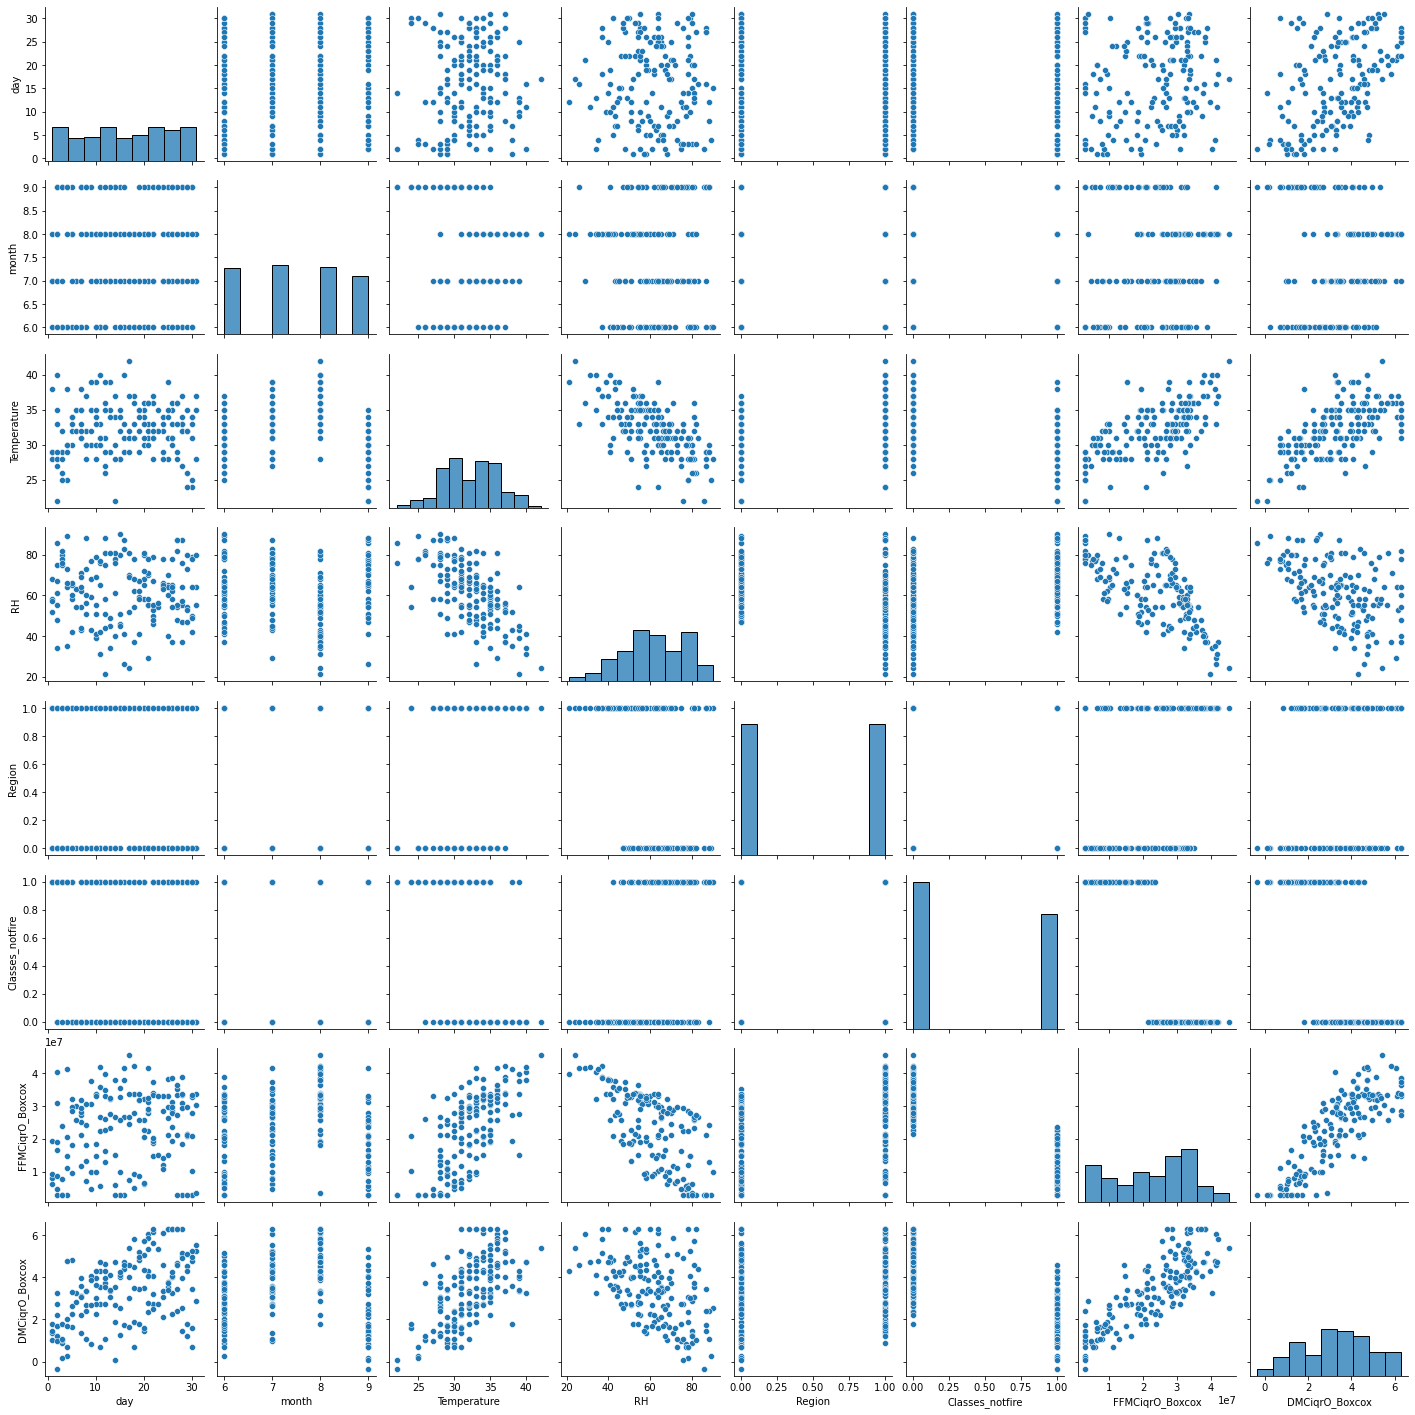

In [417]:
sns.pairplot(data)

### The label we are trying to predict is the Tempearature column. Separate out the data into X features and y labels

In [418]:
X = data.drop('Temperature',axis=1)
y = data['Temperature']

In [419]:
X

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox
0,11,7,76,0.0,1,2.246811e+07,2.753811
1,14,6,78,0.0,1,5.950505e+06,1.860759
2,4,6,89,0.0,1,2.849455e+06,0.271226
3,16,6,87,1.0,1,2.849455e+06,1.728677
4,25,6,64,0.0,0,2.969391e+07,3.774977
...,...,...,...,...,...,...,...
157,7,8,69,0.0,0,2.940889e+07,3.947748
158,11,8,31,1.0,0,4.198955e+07,4.726909
159,26,9,54,0.0,1,2.352788e+07,2.264318
160,18,7,68,0.0,0,2.787833e+07,3.469010


In [420]:
y

0      33
1      30
2      25
3      29
4      31
       ..
157    32
158    40
159    31
160    31
161    32
Name: Temperature, Length: 162, dtype: int64

In [421]:
y= y.to_numpy(dtype='int64')
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
y= y.reshape(-1,1)
y


array([[33],
       [30],
       [25],
       [29],
       [31],
       [29],
       [30],
       [35],
       [36],
       [38],
       [32],
       [30],
       [37],
       [39],
       [31],
       [35],
       [35],
       [28],
       [38],
       [31],
       [30],
       [31],
       [28],
       [28],
       [24],
       [29],
       [31],
       [28],
       [32],
       [33],
       [30],
       [30],
       [34],
       [29],
       [31],
       [30],
       [33],
       [36],
       [35],
       [33],
       [26],
       [31],
       [36],
       [28],
       [34],
       [39],
       [31],
       [31],
       [33],
       [31],
       [35],
       [31],
       [28],
       [22],
       [37],
       [34],
       [31],
       [29],
       [25],
       [29],
       [35],
       [33],
       [35],
       [35],
       [27],
       [31],
       [32],
       [28],
       [33],
       [36],
       [30],
       [30],
       [28],
       [24],
       [33],
       [32],
       [34],

#### Use scikit-learn to split up X and y into a training set and test set. Since we will later be using a Grid Search strategy, set your test proportion to 10%. To get the same data split as the solutions notebook, you can specify random_state = 0**

In [422]:


from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=0)

X_train.shape, X_test.shape

((145, 7), (17, 7))

In [423]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (145, 7)
X_test shape: (17, 7)
y_train shape: (145, 1)
y_test shape: (17, 1)


### The dataset features has a variety of scales and units. For optimal regression performance, scale the X features. Take carefuly note of what to use for .fit() vs what to use for .transform()

In [424]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [425]:
X_train

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox
98,29,8,53,1.0,0,2.144504e+07,4.546177
130,16,8,41,1.0,0,3.804356e+07,4.736628
111,30,6,42,1.0,1,2.089221e+07,3.453478
45,9,8,43,1.0,0,3.752817e+07,4.073410
56,22,9,50,0.0,1,1.888964e+07,3.225125
...,...,...,...,...,...,...,...
9,1,8,52,1.0,1,1.940182e+07,1.795841
103,13,7,45,1.0,0,2.760668e+07,3.341949
67,2,9,67,1.0,1,1.657272e+07,1.221108
117,13,9,49,1.0,0,3.250754e+07,3.374330


In [426]:
scaled_X_train

array([[ 1.51665203,  0.50740089, -0.52169176, ..., -0.86428465,
        -0.14189396,  0.76499518],
       [ 0.0276473 ,  0.50740089, -1.29555678, ..., -0.86428465,
         1.29892406,  0.88662732],
       [ 1.63119085, -1.30921957, -1.23106803, ...,  1.15702622,
        -0.18988232,  0.06713849],
       ...,
       [-1.57589625,  1.41571111,  0.38115076, ...,  1.15702622,
        -0.56483143, -1.3585734 ],
       [-0.31596917,  1.41571111, -0.77964677, ..., -0.86428465,
         0.81837518,  0.01659034],
       [ 0.14218613, -1.30921957,  0.51012826, ...,  1.15702622,
        -1.35940717, -1.10171539]])

In [427]:
X_test

,day,month,RH,Region,Classes_notfire,FFMCiqrO_Boxcox,DMCiqrO_Boxcox
66,24,6,66,0.0,0,2.856633e+07,3.325597
131,27,8,54,1.0,0,3.634623e+07,6.296191
145,29,7,73,0.0,0,2.955114e+07,5.109982
7,31,7,64,0.0,0,3.041563e+07,5.526162
44,14,7,61,0.0,1,1.523873e+07,2.690201
74,7,6,54,0.0,0,3.189903e+07,3.102377
124,27,7,87,1.0,1,2.122259e+07,3.422120
159,26,9,54,0.0,1,2.352788e+07,2.264318
86,28,9,47,0.0,1,1.858731e+07,2.534324
122,26,6,62,1.0,0,3.129921e+07,4.073410


In [428]:
scaled_X_test

array([[ 0.9439579 , -1.30921957,  0.31666201, -1.07897132, -0.86428465,
         0.47626224, -0.01453285],
       [ 1.28757438,  0.50740089, -0.45720301,  0.9268087 , -0.86428465,
         1.15158896,  1.88264844],
       [ 1.51665203, -0.40090934,  0.76808327, -1.07897132, -0.86428465,
         0.56174754,  1.1250714 ],
       [ 1.74572968, -0.40090934,  0.1876845 , -1.07897132, -0.86428465,
         0.63678856,  1.39086613],
       [-0.20143035, -0.40090934, -0.00578175, -1.07897132,  1.15702622,
        -0.68062643, -0.42033101],
       [-1.00320212, -1.30921957, -0.45720301, -1.07897132, -0.86428465,
         0.76555368, -0.15709335],
       [ 1.28757438, -0.40090934,  1.67092579,  0.9268087 ,  1.15702622,
        -0.16120374,  0.04711189],
       [ 1.17303555,  1.41571111, -0.45720301, -1.07897132,  1.15702622,
         0.03890453, -0.69232288],
       [ 1.4021132 ,  1.41571111, -0.90862427, -1.07897132,  1.15702622,
        -0.38995657, -0.51988282],
       [ 1.17303555, -1.3092

# Modelling Regression Model for predictiong Temperature of Algerian Forest

In [429]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [430]:
#pip install catboost

In [431]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [432]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.5308
- Mean Absolute Error: 2.0103
- R2 Score: 0.5653
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4362
- Mean Absolute Error: 1.0506
- R2 Score: 0.6815


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.6411
- Mean Absolute Error: 2.0803
- R2 Score: 0.5266
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.6993
- Mean Absolute Error: 1.4603
- R2 Score: 0.5542


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.5311
- Mean Absolute Error: 2.0104
- R2 Score: 0.5652
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4368
- Mean Absolute Error: 1.0548
- R2 Score: 0.6813


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 2.6398
- Mean Absolute Error: 2.0787
- R2 Score: 0.5271
----------------------------------

In [433]:
df_r2= pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
df_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681302
3,ElasticNet,0.554635
1,Lasso,0.554207
6,Random Forest Regressor,0.506182
4,K-Neighbors Regressor,0.483462
9,AdaBoost Regressor,0.407336
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.332261
5,Decision Tree,-0.462073


In [434]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(scaled_X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(scaled_X_train)
    y_test_pred = model.predict(scaled_X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.5308
- Mean Absolute Error: 2.0103
- R2 Score: 0.5653
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4362
- Mean Absolute Error: 1.0506
- R2 Score: 0.6815


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.8427
- Mean Absolute Error: 2.2520
- R2 Score: 0.4516
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.7897
- Mean Absolute Error: 1.4754
- R2 Score: 0.5055


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.5310
- Mean Absolute Error: 2.0101
- R2 Score: 0.5653
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4370
- Mean Absolute Error: 1.0565
- R2 Score: 0.6812


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 2.7752
- Mean Absolute Error: 2.1872
- R2 Score: 0.4773
----------------------------------

In [435]:
df_scaled_r2 = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
df_scaled_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681210
6,Random Forest Regressor,0.568692
3,ElasticNet,0.563205
9,AdaBoost Regressor,0.561770
1,Lasso,0.505530
4,K-Neighbors Regressor,0.487457
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.314490
5,Decision Tree,-0.462073


# Hyperparameter Tuning on Ridge Regression 
We will use an Ridge model. Create an instance of default model with scikit-learn

In [436]:
base_model = Ridge()
base_model.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [437]:
help(base_model)

Help on Ridge in module sklearn.linear_model._ridge object:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Regularization strength; must be

The Ridge model has one main parameters, alpha. Create a dictionary parameter grid of values for the Ridge. Feel free to play around with these values, keep in mind, you may not match up exactly with the solution choices

# alpha



In [441]:
param_grid = {'alpha':[0.1,1.0,2,3,5,8,9,10,11,12,50,100],
              }

              
from sklearn.model_selection import GridSearchCV



# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)


                          
grid_model.fit(scaled_X_train,y_train)



grid_model.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'alpha': 10}

### Evaluate your model's performance on the unseen 10% scaled test set.

In [442]:
y_pred = grid_model.predict(scaled_X_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Model is ',str(base_model))
print('The Mean Absolute Error is:', mean_absolute_error(y_test,y_pred))
print('The Mean Square Error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean of Target Variable is:',np.mean(data['Temperature']))
# Evaluating the Model Performance
print('The r2 Score is:',r2_score(y_test, y_pred))

Model is  Ridge()
The Mean Absolute Error is: 1.1054565884093048
The Mean Square Error is: 1.4611761312398812
The Mean of Target Variable is: 32.23456790123457
The r2 Score is: 0.670392460790605


In [440]:
df_scaled_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681210
6,Random Forest Regressor,0.568692
3,ElasticNet,0.563205
9,AdaBoost Regressor,0.561770
1,Lasso,0.505530
4,K-Neighbors Regressor,0.487457
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.314490
5,Decision Tree,-0.462073


In [443]:
df_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681302
3,ElasticNet,0.554635
1,Lasso,0.554207
6,Random Forest Regressor,0.506182
4,K-Neighbors Regressor,0.483462
9,AdaBoost Regressor,0.407336
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.332261
5,Decision Tree,-0.462073


In [444]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[31.89002315 32.        ]
 [35.37052433 36.        ]
 [32.33720216 32.        ]
 [33.31576522 35.        ]
 [31.37243539 34.        ]
 [33.78064348 33.        ]
 [30.06044791 29.        ]
 [31.29323661 31.        ]
 [31.47316298 32.        ]
 [33.10659818 36.        ]
 [33.65971041 35.        ]
 [26.47278072 26.        ]
 [30.52698022 31.        ]
 [34.13381336 34.        ]
 [28.87752968 32.        ]
 [34.51347704 35.        ]
 [29.17915564 31.        ]]


In [445]:
y_pred.shape

(17, 1)

In [446]:
y_test.shape

(17, 1)

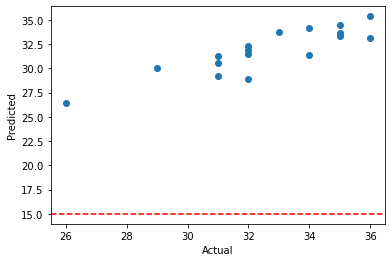

In [447]:
# 1 assumption: Linear or Not
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.axhline(y=15, color='r', linestyle='--')

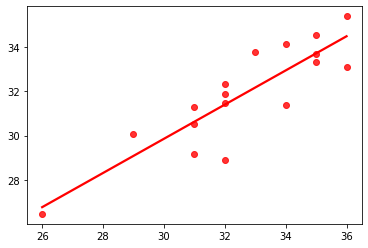

In [448]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

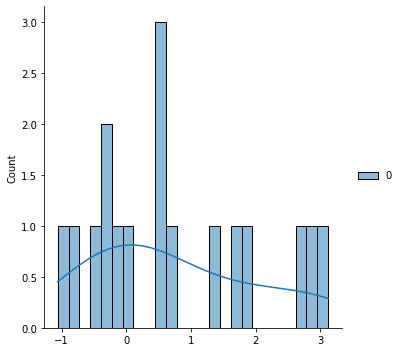

In [449]:
 # If our model was perfect, these would all be zeros
test_res = y_test - y_pred
 
 # 2 Assumption gaussian or not
sns.displot(test_res,bins=25,kde=True)
# little skewed is okay #

In [450]:
test_res

array([[ 0.10997685],
       [ 0.62947567],
       [-0.33720216],
       [ 1.68423478],
       [ 2.62756461],
       [-0.78064348],
       [-1.06044791],
       [-0.29323661],
       [ 0.52683702],
       [ 2.89340182],
       [ 1.34028959],
       [-0.47278072],
       [ 0.47301978],
       [-0.13381336],
       [ 3.12247032],
       [ 0.48652296],
       [ 1.82084436]])

In [451]:
test_res.shape 

(17, 1)

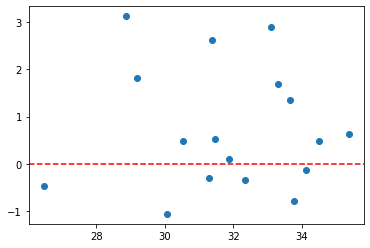

In [452]:
# 3 assumption: uniform or not    HOMOSCADECITY
plt.scatter(x=y_pred, y = test_res);
#sns.scatterplot(x=y_pred,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

# Hyperparameter Tuning on Elastic Net Regression 
We will use an Elastic Net model. Create an instance of default ElasticNet model with scikit-learn

In [453]:
base_model = ElasticNet()
base_model.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [454]:
help(base_model)

Help on ElasticNet in module sklearn.linear_model._coordinate_descent object:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet

The Elastic Net model has two main parameters, alpha and the L1 ratio. Create a dictionary parameter grid of values for the ElasticNet. Feel free to play around with these values, keep in mind, you may not match up exactly with the solution choices


# aplha , l1 ratio

In [455]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
              
from sklearn.model_selection import GridSearchCV



# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)


                          
grid_model.fit(scaled_X_train,y_train)



grid_model.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


{'alpha': 0.1, 'l1_ratio': 0.1}

### Evaluate your model's performance on the unseen 10% scaled test set.

In [456]:
y_pred = grid_model.predict(scaled_X_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Model is ',str(base_model))
print('The Mean Absolute Error is:', mean_absolute_error(y_test,y_pred))
print('The Mean Square Error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean of Target Variable is:',np.mean(data['Temperature']))
# Evaluating the Model Performance
print('The r2 Score is:',r2_score(y_test, y_pred))

Model is  ElasticNet()
The Mean Absolute Error is: 1.1252630520981253
The Mean Square Error is: 1.4756070534556278
The Mean of Target Variable is: 32.23456790123457
The r2 Score is: 0.6638497463012223


In [457]:
df_scaled_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681210
6,Random Forest Regressor,0.568692
3,ElasticNet,0.563205
9,AdaBoost Regressor,0.561770
1,Lasso,0.505530
4,K-Neighbors Regressor,0.487457
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.314490
5,Decision Tree,-0.462073


In [458]:
df_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681302
3,ElasticNet,0.554635
1,Lasso,0.554207
6,Random Forest Regressor,0.506182
4,K-Neighbors Regressor,0.483462
9,AdaBoost Regressor,0.407336
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.332261
5,Decision Tree,-0.462073


In [459]:
y_test.shape

(17, 1)

In [460]:
y_pred= y_pred.reshape(len(y_pred),1)
y_pred.shape

(17, 1)

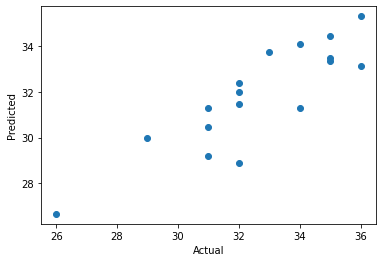

In [461]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

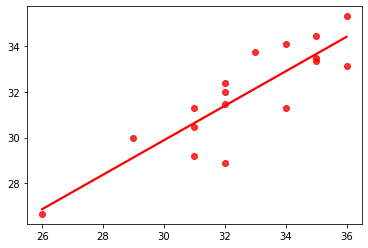

In [462]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [463]:
print(np.concatenate((   y_pred.reshape(len(y_pred),1)   , y_test.reshape(len(y_test),1))    ,1))

[[31.97450741 32.        ]
 [35.31506541 36.        ]
 [32.37276733 32.        ]
 [33.33632788 35.        ]
 [31.30594473 34.        ]
 [33.76832595 33.        ]
 [29.9950725  29.        ]
 [31.28051526 31.        ]
 [31.48797433 32.        ]
 [33.15362389 36.        ]
 [33.49128116 35.        ]
 [26.65208559 26.        ]
 [30.44411996 31.        ]
 [34.09645035 34.        ]
 [28.87569447 32.        ]
 [34.46549745 35.        ]
 [29.18570841 31.        ]]


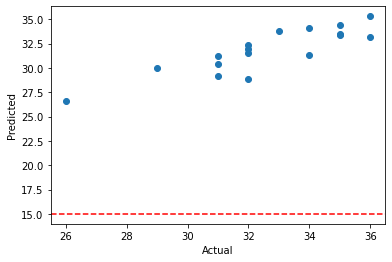

In [464]:
# 1 assumption: Linear or Not
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.axhline(y=15, color='r', linestyle='--')

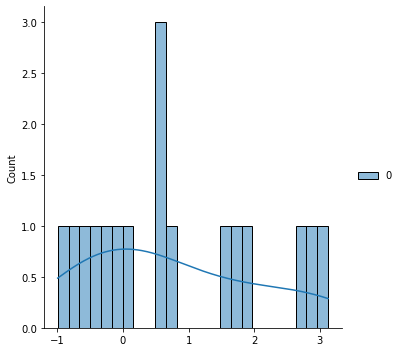

In [465]:
 # If our model was perfect, these would all be zeros
test_res = y_test - y_pred
 
 # 2 Assumption gaussian or not
sns.displot(test_res,bins=25,kde=True)
# little skewed is okay #

In [466]:
test_res

array([[ 0.02549259],
       [ 0.68493459],
       [-0.37276733],
       [ 1.66367212],
       [ 2.69405527],
       [-0.76832595],
       [-0.9950725 ],
       [-0.28051526],
       [ 0.51202567],
       [ 2.84637611],
       [ 1.50871884],
       [-0.65208559],
       [ 0.55588004],
       [-0.09645035],
       [ 3.12430553],
       [ 0.53450255],
       [ 1.81429159]])

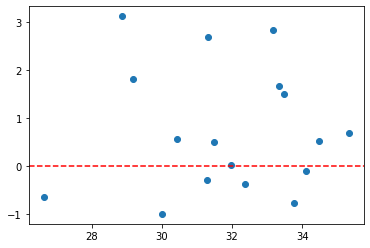

In [467]:
# 3 assumption: uniform or not    HOMOSCADECITY
plt.scatter(x=y_pred, y = test_res);
#sns.scatterplot(x=y_pred,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

# Hyperparameter Tuning on KNeighborsRegressor()
We will use an KNeighborsRegressor() model. Create an instance of default KNeighborsRegressor() model with scikit-learn

In [468]:
base_model = KNeighborsRegressor()
print('Parameters for',str(base_model),base_model.get_params().keys())
print('\n')
help(base_model)


Parameters for KNeighborsRegressor() dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


Help on KNeighborsRegressor in module sklearn.neighbors._regression object:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 

## The KNeighborsRegressor model has three main parameters, n_neighbors, weights  and p . Create a dictionary parameter grid of values for the ElasticNet. Feel free to play around with these values, keep in mind, you may not match up exactly with the solution choices


# n_neighbors, weights  and p


In [469]:
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}


              
from sklearn.model_selection import GridSearchCV



# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)


                          
grid_model.fit(scaled_X_train,y_train)



grid_model.best_params_

Fitting 5 folds for each of 84 candidates, totalling 420 fits


{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [470]:
y_pred = grid_model.predict(scaled_X_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Model is ',str(base_model))
print('The Mean Absolute Error is:', mean_absolute_error(y_test,y_pred))
print('The Mean Square Error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean of Target Variable is:',np.mean(data['Temperature']))
# Evaluating the Model Performance
print('The r2 Score is:',r2_score(y_test, y_pred))

Model is  KNeighborsRegressor()
The Mean Absolute Error is: 1.4770307457215515
The Mean Square Error is: 1.8302699295227043
The Mean of Target Variable is: 32.23456790123457
The r2 Score is: 0.4828431429965555


In [471]:
df_scaled_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681210
6,Random Forest Regressor,0.568692
3,ElasticNet,0.563205
9,AdaBoost Regressor,0.561770
1,Lasso,0.505530
4,K-Neighbors Regressor,0.487457
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.314490
5,Decision Tree,-0.462073


In [472]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[31.3580228  32.        ]
 [34.70070717 36.        ]
 [32.23473497 32.        ]
 [32.47263964 35.        ]
 [32.6182638  34.        ]
 [33.40966479 33.        ]
 [32.2512234  29.        ]
 [30.1650816  31.        ]
 [30.67151773 32.        ]
 [32.60556764 36.        ]
 [33.39876953 35.        ]
 [26.47477729 26.        ]
 [32.18138682 31.        ]
 [34.15274389 34.        ]
 [28.60546398 32.        ]
 [34.37676733 35.        ]
 [28.62220726 31.        ]]


In [473]:
y_test.shape

(17, 1)

In [474]:
y_pred.shape

(17, 1)

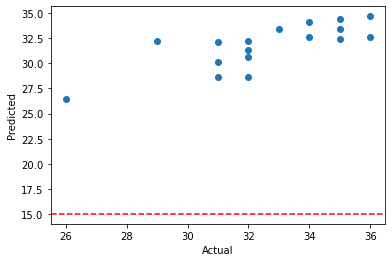

In [475]:
# 1 assumption: Linear or Not
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.axhline(y=15, color='r', linestyle='--')

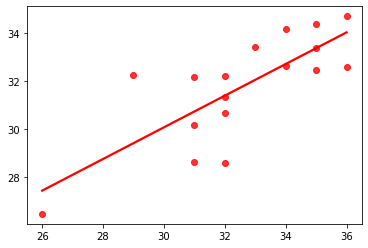

In [476]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

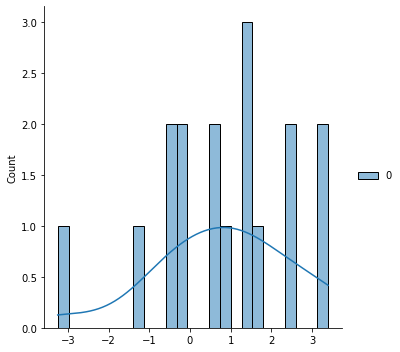

In [477]:
 # If our model was perfect, these would all be zeros
test_res = y_test - y_pred
 
 # 2 Assumption gaussian or not
sns.displot(test_res,bins=25,kde=True)
# little skewed is okay #

In [478]:
test_res

array([[ 0.6419772 ],
       [ 1.29929283],
       [-0.23473497],
       [ 2.52736036],
       [ 1.3817362 ],
       [-0.40966479],
       [-3.2512234 ],
       [ 0.8349184 ],
       [ 1.32848227],
       [ 3.39443236],
       [ 1.60123047],
       [-0.47477729],
       [-1.18138682],
       [-0.15274389],
       [ 3.39453602],
       [ 0.62323267],
       [ 2.37779274]])

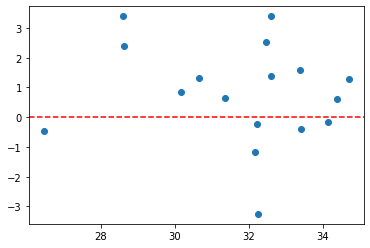

In [479]:
# 3 assumption: uniform or not    HOMOSCADECITY
plt.scatter(x=y_pred, y = test_res);
#sns.scatterplot(x=y_pred,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

# Hyperparameter Tuning on Random Forest Regression 
We will use an Random Forest model. Create an instance of default Random Forest model with scikit-learn

In [480]:

base_model = RandomForestRegressor()
base_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [481]:
help(base_model)

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimat


> Efficient use of our time is just to try out a wide range of values and see what works! We will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)



In [482]:
param_grid = {'bootstrap': [True],
 'max_depth': [20, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200]}


              
from sklearn.model_selection import GridSearchCV



# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)


                          
grid_model.fit(X_train,y_train)



grid_model.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [483]:
y_pred = grid_model.predict(X_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Model is ',str(base_model))
print('The Mean Absolute Error is:', mean_absolute_error(y_test,y_pred))
print('The Mean Square Error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean of Target Variable is:',np.mean(data['Temperature']))
# Evaluating the Model Performance
print('The r2 Score is:',r2_score(y_test, y_pred))

Model is  RandomForestRegressor()
The Mean Absolute Error is: 1.3453782679738537
The Mean Square Error is: 1.7726263496708343
The Mean of Target Variable is: 32.23456790123457
The r2 Score is: 0.5149054451211628


In [484]:
df_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681302
3,ElasticNet,0.554635
1,Lasso,0.554207
6,Random Forest Regressor,0.506182
4,K-Neighbors Regressor,0.483462
9,AdaBoost Regressor,0.407336
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.332261
5,Decision Tree,-0.462073


In [485]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[31.62347421 32.        ]
 [34.48706349 36.        ]
 [32.59865711 32.        ]
 [33.07645274 35.        ]
 [32.25860642 34.        ]
 [33.10264159 33.        ]
 [32.17604762 29.        ]
 [30.95598791 31.        ]
 [30.17477958 32.        ]
 [32.10386436 36.        ]
 [33.59528608 35.        ]
 [26.51808532 26.        ]
 [31.11197222 31.        ]
 [34.00831151 34.        ]
 [28.96929942 32.        ]
 [34.18141468 35.        ]
 [29.21805592 31.        ]]


In [487]:
y_test.shape

(17, 1)

In [489]:
y_pred= y_pred.reshape(len(y_pred),1)
y_pred.shape

(17, 1)

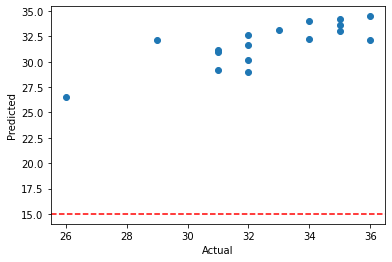

In [490]:
# 1 assumption: Linear or Not
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.axhline(y=15, color='r', linestyle='--')

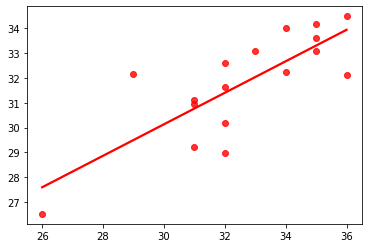

In [491]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [493]:
y_pred

array([[31.62347421],
       [34.48706349],
       [32.59865711],
       [33.07645274],
       [32.25860642],
       [33.10264159],
       [32.17604762],
       [30.95598791],
       [30.17477958],
       [32.10386436],
       [33.59528608],
       [26.51808532],
       [31.11197222],
       [34.00831151],
       [28.96929942],
       [34.18141468],
       [29.21805592]])

In [494]:
 # If our model was perfect, these would all be zeros
test_res = y_test - y_pred
test_res

array([[ 0.37652579],
       [ 1.51293651],
       [-0.59865711],
       [ 1.92354726],
       [ 1.74139358],
       [-0.10264159],
       [-3.17604762],
       [ 0.04401209],
       [ 1.82522042],
       [ 3.89613564],
       [ 1.40471392],
       [-0.51808532],
       [-0.11197222],
       [-0.00831151],
       [ 3.03070058],
       [ 0.81858532],
       [ 1.78194408]])

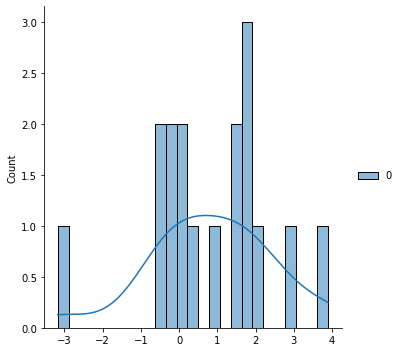

In [495]:


# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
test_res= test_res.reshape(-1,1)
y
 # 2 Assumption gaussian or not
sns.displot(test_res,bins=25,kde=True)
# little skewed is okay #

In [496]:
test_res.shape

(17, 1)

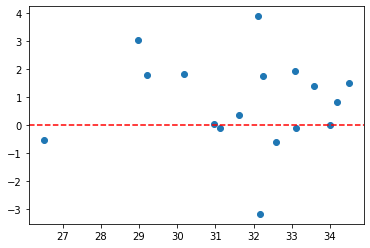

In [497]:
# 3 assumption: uniform or not    HOMOSCADECITY
plt.scatter(x=y_pred, y = test_res);
#sns.scatterplot(x=y_pred,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

# Hyperparameter Tuning on XGBRegressor() Regression 
We will use an XGBRegressor() model. Create an instance of default XGBRegressor() model with scikit-learn

- https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

In [498]:
 
base_model = XGBRegressor()
base_model.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [499]:
help(base_model)

Help on XGBRegressor in module xgboost.sklearn object:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |

In [500]:
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}




              
from sklearn.model_selection import GridSearchCV



# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)


                          
grid_model.fit(X_train,y_train)



grid_model.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[13:01:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:01:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [501]:
y_pred = grid_model.predict(X_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Model is ',str(base_model))
print('The Mean Absolute Error is:', mean_absolute_error(y_test,y_pred))
print('The Mean Square Error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean of Target Variable is:',np.mean(data['Temperature']))
# Evaluating the Model Performance
print('The r2 Score is:',r2_score(y_test, y_pred))

Model is  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
The Mean Absolute Error is: 1.6683297998764937
The Mean Square Error is: 2.2785140961111394
The Mean of Target Variable is: 32.23456790123457
The r2 Score is: 0.19851492814893157


In [502]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[31.75577354 32.        ]
 [34.90836334 36.        ]
 [32.19781494 32.        ]
 [33.51812363 35.        ]
 [32.92115784 34.        ]
 [32.30657959 33.        ]
 [34.95568848 29.        ]
 [29.60539627 31.        ]
 [29.46718407 32.        ]
 [31.44638634 36.        ]
 [35.118927   35.        ]
 [25.11175728 26.        ]
 [31.36042976 31.        ]
 [33.40026474 34.        ]
 [29.36440849 32.        ]
 [32.58708572 35.        ]
 [28.87877274 31.        ]]


In [504]:
y_test.shape

(17, 1)

In [506]:
y_pred= y_pred.reshape(len(y_pred),1)
y_pred.shape

(17, 1)

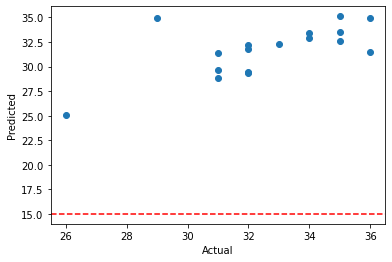

In [507]:
# 1 assumption: Linear or Not
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.axhline(y=15, color='r', linestyle='--')

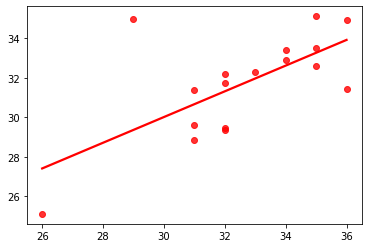

In [508]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

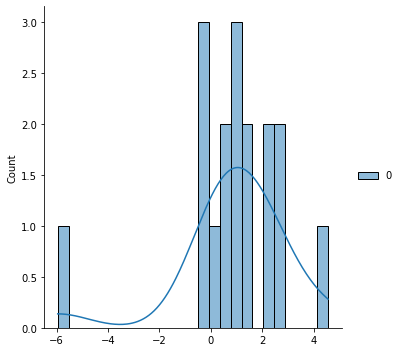

In [509]:
 # If our model was perfect, these would all be zeros
test_res = y_test - y_pred
 
 # 2 Assumption gaussian or not
sns.displot(test_res,bins=25,kde=True)
# little skewed is okay #

In [510]:
test_res

array([[ 0.24422646],
       [ 1.09163666],
       [-0.19781494],
       [ 1.48187637],
       [ 1.07884216],
       [ 0.69342041],
       [-5.95568848],
       [ 1.39460373],
       [ 2.53281593],
       [ 4.55361366],
       [-0.118927  ],
       [ 0.88824272],
       [-0.36042976],
       [ 0.59973526],
       [ 2.63559151],
       [ 2.41291428],
       [ 2.12122726]])

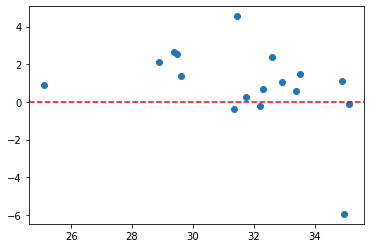

In [511]:
# 3 assumption: uniform or not    HOMOSCADECITY
plt.scatter(x=y_pred, y = test_res);
#sns.scatterplot(x=y_pred,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

# Hyperparameter Tuning on CatBoostRegressor
We will use an CatBoostRegressor model. Create an instance of default CatBoostRegressor model with scikit-learn

In [512]:
base_model = CatBoostRegressor(verbose=False)
base_model.get_params().keys()


dict_keys(['loss_function', 'verbose'])

In [513]:
help(base_model)

Help on CatBoostRegressor in module catboost.core object:

class CatBoostRegressor(CatBoost)
 |  CatBoostRegressor(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function='RMSE', border_count=None, feature_border_type=None, per_float_feature_quantization=None, input_borders=None, output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, best_model_min_trees=None, verbose=None, silent=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, target_border=None, one_hot_max_size=None, random_strength=None, name=None, ignored_features=None, train_dir=None, custom_metric=None, eval_metric=None, bagging_temperature=None, save_snapshot=None,

In [514]:
param_grid= {'learning_rate': [0.03, 0.1],'depth': [4, 6, 10],'l2_leaf_reg': [1, 3, 5]}


from sklearn.model_selection import GridSearchCV



# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)


                          
grid_model.fit(X_train,y_train)



grid_model.best_params_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'depth': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [515]:
y_pred = grid_model.predict(X_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Model is ',str(base_model))
print('The Mean Absolute Error is:', mean_absolute_error(y_test,y_pred))
print('The Mean Square Error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean of Target Variable is:',np.mean(data['Temperature']))
# Evaluating the Model Performance
print('The r2 Score is:',r2_score(y_test, y_pred))

Model is  <catboost.core.CatBoostRegressor object at 0x000002991C2A83D0>
The Mean Absolute Error is: 1.6238764799510126
The Mean Square Error is: 2.047444110697162
The Mean of Target Variable is: 32.23456790123457
The r2 Score is: 0.3528333789114132


In [516]:
df_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681302
3,ElasticNet,0.554635
1,Lasso,0.554207
6,Random Forest Regressor,0.506182
4,K-Neighbors Regressor,0.483462
9,AdaBoost Regressor,0.407336
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.332261
5,Decision Tree,-0.462073


In [517]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[30.86026706 32.        ]
 [34.58642718 36.        ]
 [32.87775936 32.        ]
 [33.01073418 35.        ]
 [33.02256335 34.        ]
 [32.06451604 33.        ]
 [34.14945325 29.        ]
 [30.49390168 31.        ]
 [31.10807893 32.        ]
 [32.78950839 36.        ]
 [33.34050043 35.        ]
 [25.54602482 26.        ]
 [32.35757534 31.        ]
 [33.2455233  34.        ]
 [28.08286149 32.        ]
 [33.85792398 35.        ]
 [29.77005694 31.        ]]


In [518]:
y_test.shape

(17, 1)

In [520]:
y_pred = y_pred.reshape(len(y_pred),1)
y_pred.shape

(17, 1)

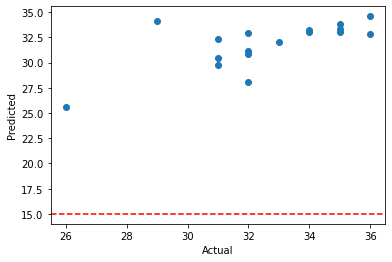

In [521]:
# 1 assumption: Linear or Not
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.axhline(y=15, color='r', linestyle='--')

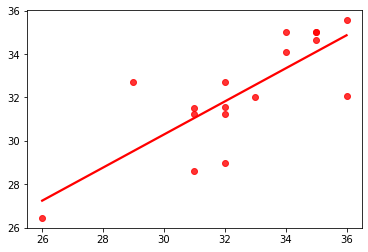

In [522]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');


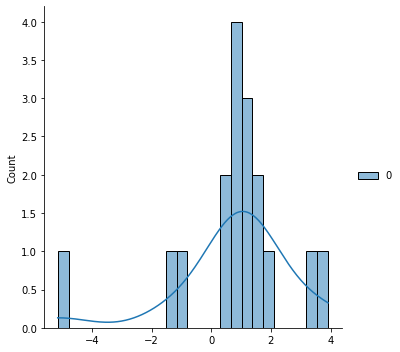

In [523]:
 # If our model was perfect, these would all be zeros
test_res = y_test - y_pred
 
 # 2 Assumption gaussian or not
sns.displot(test_res,bins=25,kde=True)
# little skewed is okay #

# Hyperparameter Tuning on AdaBoostRegressor() Regression 
We will use an AdaBoostRegressor() model. Create an instance of default AdaBoostRegressor() model with scikit-learn

In [524]:
df_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681302
3,ElasticNet,0.554635
1,Lasso,0.554207
6,Random Forest Regressor,0.506182
4,K-Neighbors Regressor,0.483462
9,AdaBoost Regressor,0.407336
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.332261
5,Decision Tree,-0.462073


In [525]:
df_scaled_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681210
6,Random Forest Regressor,0.568692
3,ElasticNet,0.563205
9,AdaBoost Regressor,0.561770
1,Lasso,0.505530
4,K-Neighbors Regressor,0.487457
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.314490
5,Decision Tree,-0.462073


In [555]:
base_model = AdaBoostRegressor()
base_model.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [556]:
help(base_model)

Help on AdaBoostRegressor in module sklearn.ensemble._weight_boosting object:

class AdaBoostRegressor(sklearn.base.RegressorMixin, BaseWeightBoosting)
 |  AdaBoostRegressor(base_estimator=None, *, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
 |  
 |  An AdaBoost regressor.
 |  
 |  An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
 |  regressor on the original dataset and then fits additional copies of the
 |  regressor on the same dataset but where the weights of instances are
 |  adjusted according to the error of the current prediction. As such,
 |  subsequent regressors focus more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost.R2 [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      If ``None``, then the base e

In [560]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()}

rf =  RandomForestRegressor(bootstrap= True, max_depth= 20,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 5,n_estimators= 200)

In [563]:

#param_grid={'base_estimator' : [rf],'n_estimators':[500],'learning_rate':[.1],'random_state':[1]}
param_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
# 

from sklearn.model_selection import GridSearchCV



# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)


                          
grid_model.fit(X_train,y_train)



grid_model.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 1}

In [564]:
y_pred = grid_model.predict(X_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Model is ',str(base_model))
print('The Mean Absolute Error is:', mean_absolute_error(y_test,y_pred))
print('The Mean Square Error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean of Target Variable is:',np.mean(data['Temperature']))
# Evaluating the Model Performance
print('The r2 Score is:',r2_score(y_test, y_pred))

Model is  AdaBoostRegressor()
The Mean Absolute Error is: 1.0937666310713103
The Mean Square Error is: 1.5150841755790552
The Mean of Target Variable is: 32.23456790123457
The r2 Score is: 0.6456230036981683


In [565]:
df_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681302
3,ElasticNet,0.554635
1,Lasso,0.554207
6,Random Forest Regressor,0.506182
4,K-Neighbors Regressor,0.483462
9,AdaBoost Regressor,0.407336
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.332261
5,Decision Tree,-0.462073


In [566]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[31.02325581 32.        ]
 [35.23076923 36.        ]
 [33.265625   32.        ]
 [34.06060606 35.        ]
 [33.7        34.        ]
 [32.1875     33.        ]
 [31.4        29.        ]
 [31.4        31.        ]
 [31.4        32.        ]
 [32.         36.        ]
 [34.80769231 35.        ]
 [26.         26.        ]
 [31.08333333 31.        ]
 [34.42857143 34.        ]
 [29.25714286 32.        ]
 [34.21126761 35.        ]
 [29.10526316 31.        ]]


In [567]:
y_test.shape

(17, 1)

In [568]:
y_pred = y_pred.reshape(len(y_pred),1)
y_pred.shape

(17, 1)

# Assumptions for Linear Regression

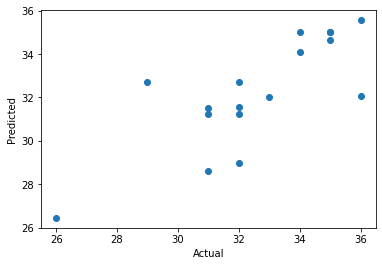

In [569]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

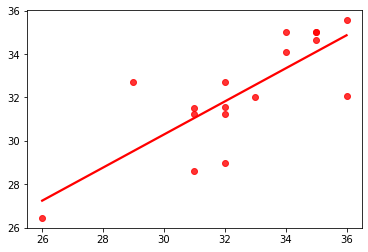

In [570]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');

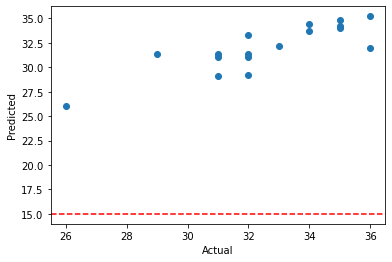

In [571]:
# 1 assumption: Linear or Not
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.axhline(y=15, color='r', linestyle='--')

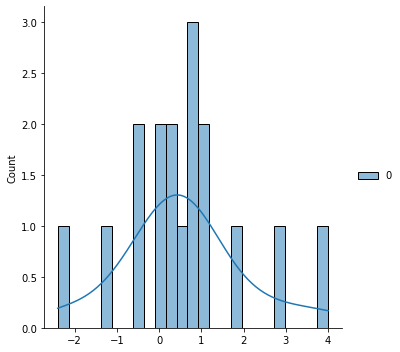

In [572]:
 # If our model was perfect, these would all be zeros
test_res = y_test - y_pred
 
 # 2 Assumption gaussian or not
sns.displot(test_res,bins=25,kde=True)
# little skewed is okay #

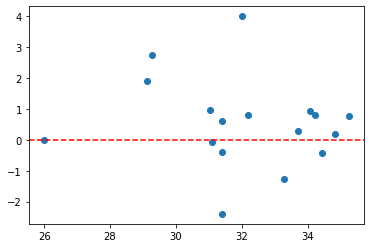

In [573]:
# 3 assumption: uniform or not    HOMOSCADECITY
plt.scatter(x=y_pred, y = test_res);
#sns.scatterplot(x=y_pred,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [576]:
df_r2

,Model Name,R2_Score
0,Linear Regression,0.681542
2,Ridge,0.681302
3,ElasticNet,0.554635
1,Lasso,0.554207
6,Random Forest Regressor,0.506182
4,K-Neighbors Regressor,0.483462
9,AdaBoost Regressor,0.407336
8,CatBoosting Regressor,0.348072
7,XGBRegressor,0.332261
5,Decision Tree,-0.462073


# Linear Regression

In [578]:
base_model = LinearRegression()
base_model.get_params().keys()


dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [579]:
help(base_model)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [581]:
base_model.fit(X_train,y_train)

LinearRegression()

In [583]:
y_pred = base_model.predict(X_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Model is ',str(base_model))
print('The Mean Absolute Error is:', mean_absolute_error(y_test,y_pred))
print('The Mean Square Error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean of Target Variable is:',np.mean(data['Temperature']))
# Evaluating the Model Performance
print('The r2 Score is:',r2_score(y_test, y_pred))

Model is  LinearRegression()
The Mean Absolute Error is: 1.0506460626946874
The Mean Square Error is: 1.4362495871453187
The Mean of Target Variable is: 32.23456790123457
The r2 Score is: 0.6815422428791648


In [584]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[31.67445225 32.        ]
 [35.53651183 36.        ]
 [32.2888289  32.        ]
 [33.29706733 35.        ]
 [31.57612871 34.        ]
 [33.80713492 33.        ]
 [30.3073585  29.        ]
 [31.44701652 31.        ]
 [31.50912921 32.        ]
 [32.94975958 36.        ]
 [34.17849847 35.        ]
 [26.03263226 26.        ]
 [30.80487985 31.        ]
 [34.30480983 34.        ]
 [28.8827737  32.        ]
 [34.69732853 35.        ]
 [29.22026841 31.        ]]


In [585]:
y_test.shape

(17, 1)

In [586]:
y_pred = y_pred.reshape(len(y_pred),1)
y_pred.shape

(17, 1)

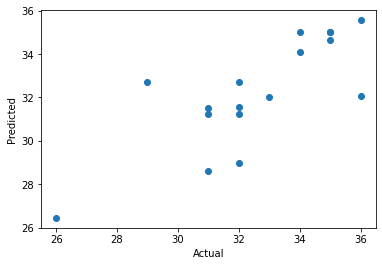

In [587]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

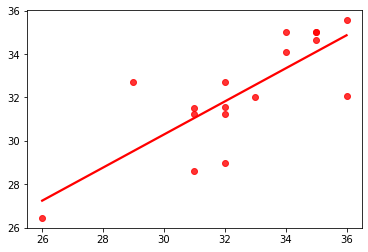

In [588]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');

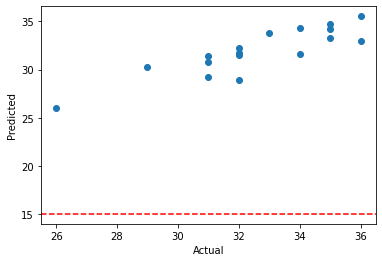

In [589]:
# 1 assumption: Linear or Not
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.axhline(y=15, color='r', linestyle='--')

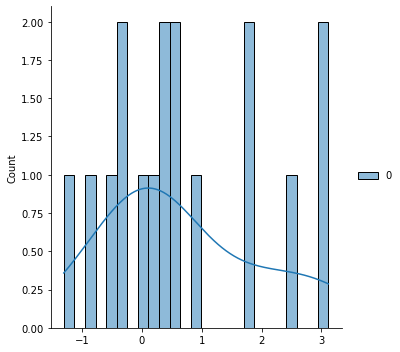

In [590]:
 # If our model was perfect, these would all be zeros
test_res = y_test - y_pred
 
 # 2 Assumption gaussian or not
sns.displot(test_res,bins=25,kde=True)
# little skewed is okay #

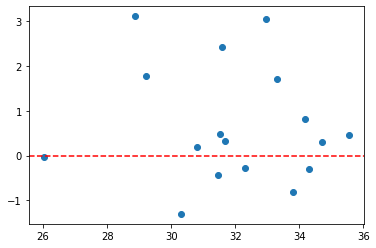

In [591]:
# 3 assumption: uniform or not    HOMOSCADECITY
plt.scatter(x=y_pred, y = test_res);
#sns.scatterplot(x=y_pred,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [592]:
base_model.fit(scaled_X_train,y_train)

LinearRegression()

In [594]:
y_pred = grid_model.predict(scaled_X_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('The Mean Absolute Error is: {}', mean_absolute_error(y_test,y_pred))
print('The Mean Square Error is: {}',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean of Target Variable is: {}',np.mean(data['Temperature']))
# Evaluating the Model Performance
print('The r2 Score is: {}',r2_score(y_test, y_pred))

The Mean Absolute Error is: {} 4.42995297666578
The Mean Square Error is: {} 4.75565640171518
The Mean of Target Variable is: {} 32.23456790123457
The r2 Score is: {} -2.4915071567465032


In [598]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[27.38461538 32.        ]
 [30.94444444 36.        ]
 [29.34615385 32.        ]
 [29.34615385 35.        ]
 [27.38461538 34.        ]
 [27.38461538 33.        ]
 [27.38461538 29.        ]
 [27.38461538 31.        ]
 [27.38461538 32.        ]
 [28.58823529 36.        ]
 [27.5        35.        ]
 [27.38461538 26.        ]
 [27.38461538 31.        ]
 [30.94444444 34.        ]
 [27.38461538 32.        ]
 [30.94444444 35.        ]
 [27.38461538 31.        ]]


In [599]:
y_test.shape

(17, 1)

In [600]:
y_pred = y_pred.reshape(len(y_pred),1)
y_pred.shape

(17, 1)

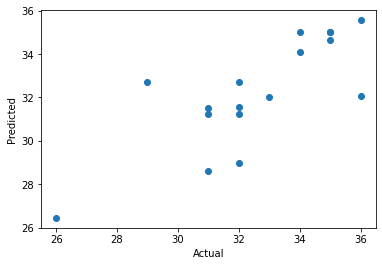

In [601]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

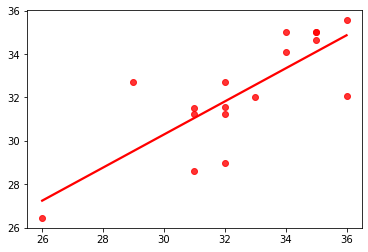

In [602]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');

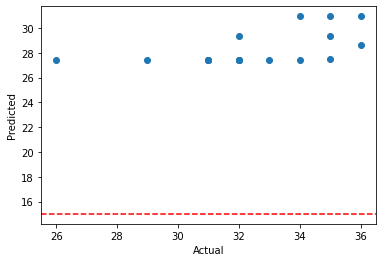

In [603]:
# 1 assumption: Linear or Not
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.axhline(y=15, color='r', linestyle='--')

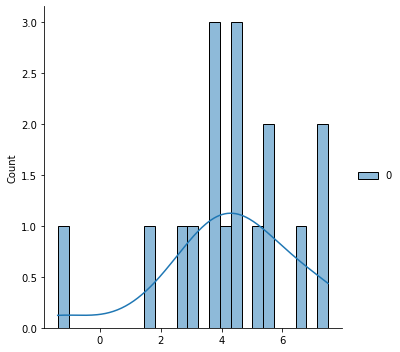

In [604]:
 # If our model was perfect, these would all be zeros
test_res = y_test - y_pred
 
 # 2 Assumption gaussian or not
sns.displot(test_res,bins=25,kde=True)
# little skewed is okay #

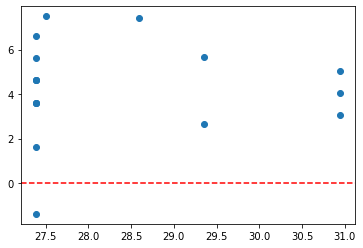

In [605]:
# 3 assumption: uniform or not    HOMOSCADECITY
plt.scatter(x=y_pred, y = test_res);
#sns.scatterplot(x=y_pred,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')